In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('C:/Users/RIDWAN/Downloads/Call Center.csv')
data.head()

,id,customer_name,sentiment,csat_score,call_timestamp,reason,city,state,channel,response_time,call duration in minutes,call_center
0,DKK-57076809-w-055481-fU,Analise Gairdner,Neutral,7.0,10/29/2020,Billing Question,Detroit,Michigan,Call-Center,Within SLA,17,Los Angeles/CA
1,QGK-72219678-w-102139-KY,Crichton Kidsley,Very Positive,NaN,10/05/2020,Service Outage,Spartanburg,South Carolina,Chatbot,Within SLA,23,Baltimore/MD
2,GYJ-30025932-A-023015-LD,Averill Brundrett,Negative,NaN,10/04/2020,Billing Question,Gainesville,Florida,Call-Center,Above SLA,45,Los Angeles/CA
3,ZJI-96807559-i-620008-m7,Noreen Lafflina,Very Negative,1.0,10/17/2020,Billing Question,Portland,Oregon,Chatbot,Within SLA,12,Los Angeles/CA
4,DDU-69451719-O-176482-Fm,Toma Van der Beken,Very Positive,NaN,10/17/2020,Payments,Fort Wayne,Indiana,Call-Center,Within SLA,23,Los Angeles/CA


In [3]:
data.shape

(32941, 12)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32941 entries, 0 to 32940
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        32941 non-null  object 
 1   customer_name             32941 non-null  object 
 2   sentiment                 32941 non-null  object 
 3   csat_score                12271 non-null  float64
 4   call_timestamp            32941 non-null  object 
 5   reason                    32941 non-null  object 
 6   city                      32941 non-null  object 
 7   state                     32941 non-null  object 
 8   channel                   32941 non-null  object 
 9   response_time             32941 non-null  object 
 10  call duration in minutes  32941 non-null  int64  
 11  call_center               32941 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 3.0+ MB


In [5]:
for dtype, col in (list(zip(data.dtypes, data.columns))):
  if dtype == 'int64' or dtype == 'float64':
    print(col, dtype)
    print(data[col].min(), data[col].max())
  else:
    print(col, dtype)
    print(data[col].unique())

  print()

id object
['DKK-57076809-w-055481-fU' 'QGK-72219678-w-102139-KY'
 'GYJ-30025932-A-023015-LD' ... 'WDS-58440679-I-064360-TT'
 'FTZ-87704815-T-824288-iC' 'OOR-17971494-i-311571-PR']

customer_name object
['Analise Gairdner' 'Crichton Kidsley' 'Averill Brundrett' ...
 'Margaux Slaten' 'Odey Seed' 'Mozelle Berlin']

sentiment object
['Neutral' 'Very Positive' 'Negative' 'Very Negative' 'Positive']

csat_score float64
1.0 10.0

call_timestamp object
['10/29/2020' '10/05/2020' '10/04/2020' '10/17/2020' '10/28/2020'
 '10/16/2020' '10/21/2020' '10/03/2020' '10/07/2020' '10/09/2020'
 '10/11/2020' '10/02/2020' '10/10/2020' '10/06/2020' '10/18/2020'
 '10/30/2020' '10/26/2020' '10/12/2020' '10/08/2020' '10/22/2020'
 '10/01/2020' '10/27/2020' '10/13/2020' '10/19/2020' '10/23/2020'
 '10/14/2020' '10/25/2020' '10/15/2020' '10/24/2020' '10/20/2020'
 '10/31/2020']

reason object
['Billing Question' 'Service Outage' 'Payments']

city object
['Detroit' 'Spartanburg' 'Gainesville' 'Portland' 'Fort Wayne'


In [6]:
data['call_timestamp'] = pd.to_datetime(data['call_timestamp'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32941 entries, 0 to 32940
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id                        32941 non-null  object        
 1   customer_name             32941 non-null  object        
 2   sentiment                 32941 non-null  object        
 3   csat_score                12271 non-null  float64       
 4   call_timestamp            32941 non-null  datetime64[ns]
 5   reason                    32941 non-null  object        
 6   city                      32941 non-null  object        
 7   state                     32941 non-null  object        
 8   channel                   32941 non-null  object        
 9   response_time             32941 non-null  object        
 10  call duration in minutes  32941 non-null  int64         
 11  call_center               32941 non-null  object        
dtypes: datetime64[ns](

In [7]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
32936    False
32937    False
32938    False
32939    False
32940    False
Length: 32941, dtype: bool

In [8]:
data.duplicated().sum()

0

In [9]:
data.isna().sum()

id                              0
customer_name                   0
sentiment                       0
csat_score                  20670
call_timestamp                  0
reason                          0
city                            0
state                           0
channel                         0
response_time                   0
call duration in minutes        0
call_center                     0
dtype: int64

In [10]:
data.drop('csat_score', axis=1, inplace=True)

In [11]:
def percent_info(ax, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), ha="center", va="bottom")

def percent_info_hue(ax, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in ax.patches]
    patch = [p for p in ax.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height()
            ax.annotate(percentage, (x, y), size = 10)

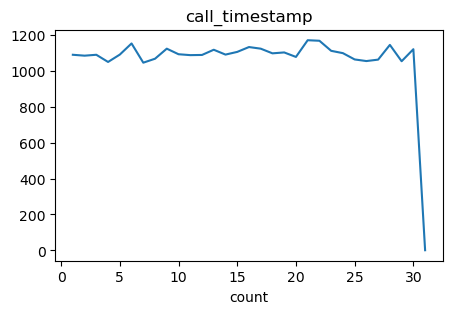

In [12]:
total = data['call_timestamp'].dt.day.value_counts()
total = total.sort_index()

plt.figure(figsize=(5,3))
plt.plot(total.index, total.values)
plt.xlabel('count')
plt.title('call_timestamp')
plt.show()


In [13]:
print('call_timestamp average: ', data['call_timestamp'].value_counts().mean())

call_timestamp average:  1062.6129032258063


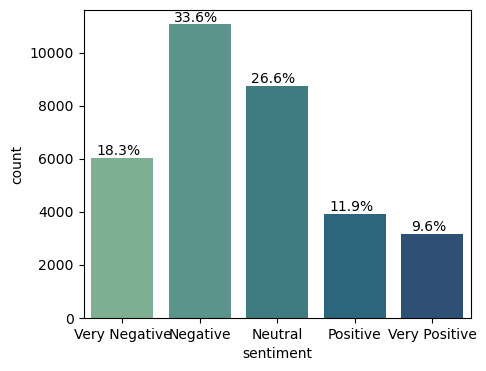

In [14]:
plt.figure(figsize=(5,4))
ax = sns.countplot(data=data, x='sentiment', 
                   order=["Very Negative", "Negative", "Neutral", "Positive", "Very Positive"], 
                   palette='crest')
percent_info(ax, data)

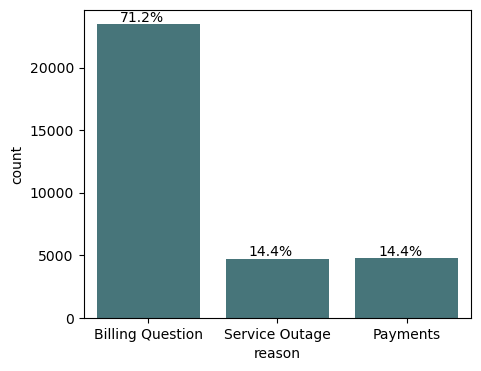

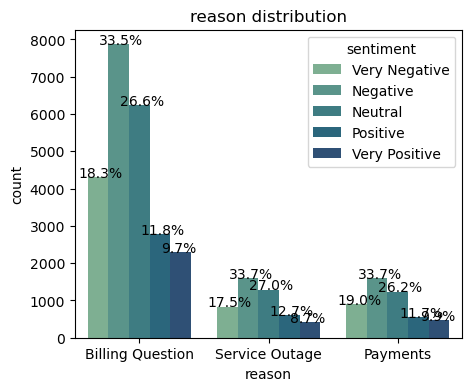

In [15]:
plt.figure(figsize=(5,4))
ax = sns.countplot(data=data, x='reason', color='#3E7C82')
percent_info(ax, data)
plt.show()

plt.figure(figsize=(5,4))
plt.title('reason distribution')
ax = sns.countplot(data=data, x='reason', hue='sentiment', 
                   hue_order=['Very Negative', 'Negative', 'Neutral', 'Positive', 'Very Positive'],
                   palette='crest')
percent_info_hue(ax, data['reason'],3,5)

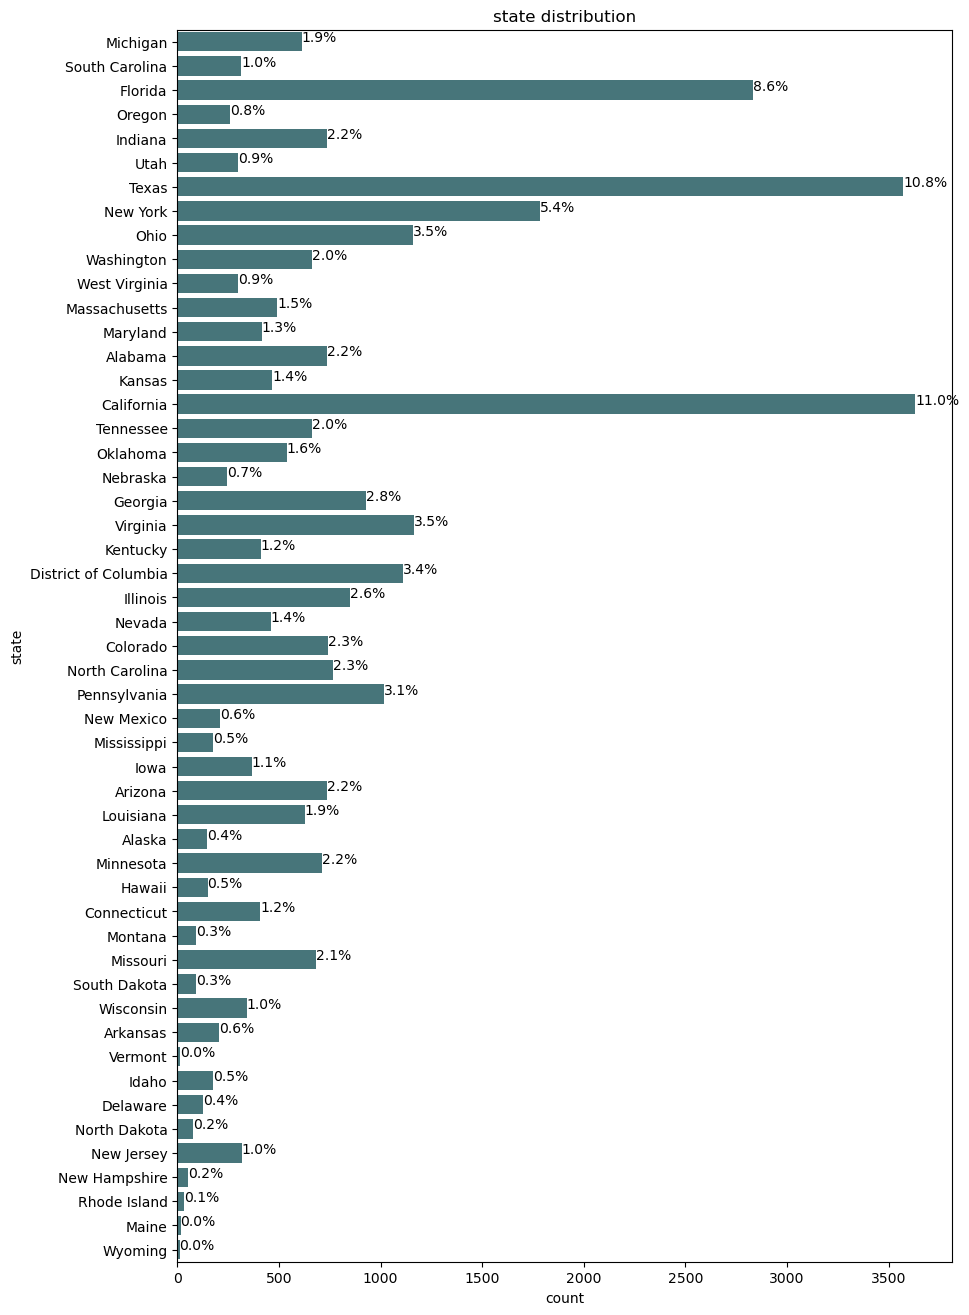

In [16]:
plt.figure(figsize=(10,16))
ax = sns.countplot(data=data, y='state', color='#3E7C82')
plt.title('state distribution')

total = len(data['state'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

In [17]:
counts = data['state'].value_counts()
percs = data['state'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

pd.concat([counts, percs], axis=1, keys=['count', 'percents'])

,count,percents
state,,
California,3631,11.0%
Texas,3572,10.8%
Florida,2834,8.6%
New York,1786,5.4%
Virginia,1164,3.5%
Ohio,1160,3.5%
District of Columbia,1110,3.4%
Pennsylvania,1017,3.1%
Georgia,926,2.8%


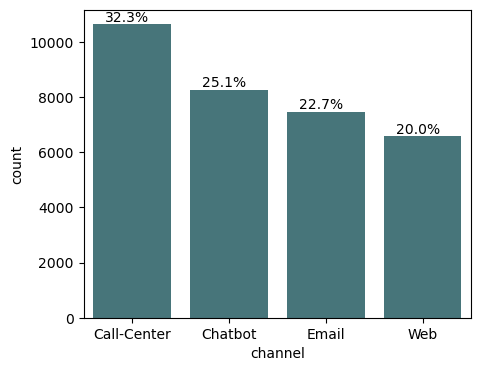

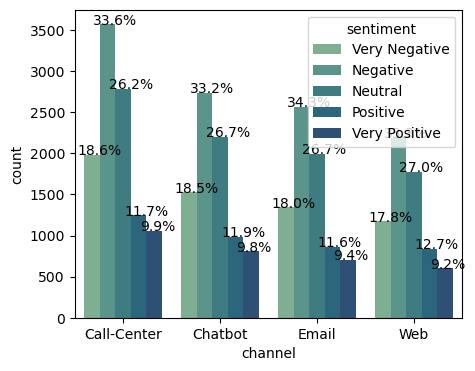

In [18]:
plt.figure(figsize=(5,4))
ax = sns.countplot(data=data, x='channel', color='#3E7C82')
percent_info(ax, data)
plt.show()

plt.figure(figsize=(5,4))
ax = sns.countplot(data=data, x='channel', hue='sentiment', 
                   hue_order=['Very Negative', 'Negative', 'Neutral', 'Positive', 'Very Positive'],
                   palette='crest')
percent_info_hue(ax, data['channel'],4,5)

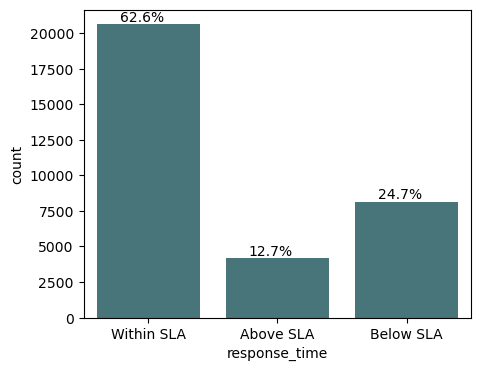

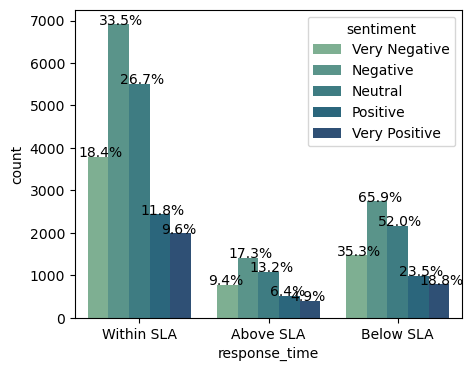

In [19]:
plt.figure(figsize=(5,4))
ax = sns.countplot(data=data, x='response_time', color='#3E7C82')
percent_info(ax, data)
plt.show()

plt.figure(figsize=(5,4))
ax = sns.countplot(data=data, x='response_time', hue='sentiment', 
                   hue_order=['Very Negative', 'Negative', 'Neutral', 'Positive', 'Very Positive'],
                   palette='crest')
percent_info_hue(ax, data['response_time'],3,5)

<Axes: xlabel='call duration in minutes', ylabel='Count'>

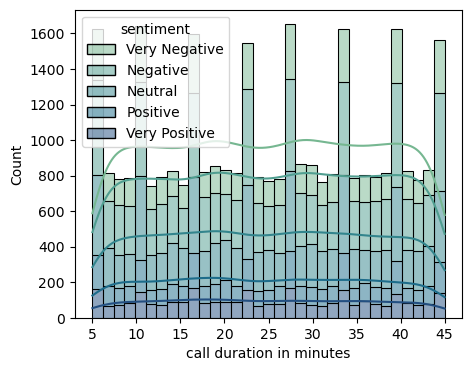

In [20]:
plt.figure(figsize=(5,4))
sns.histplot(data=data, x='call duration in minutes', hue='sentiment', 
             hue_order=['Very Negative', 'Negative', 'Neutral', 'Positive', 'Very Positive'],
             multiple='stack', kde=True, palette='crest')

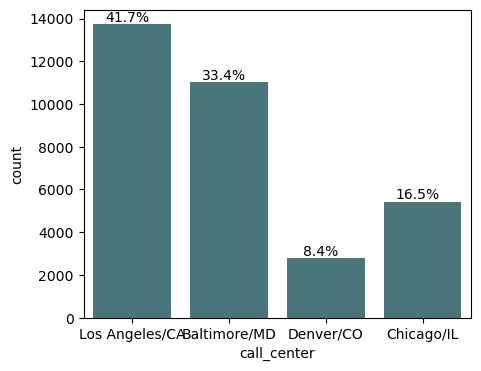

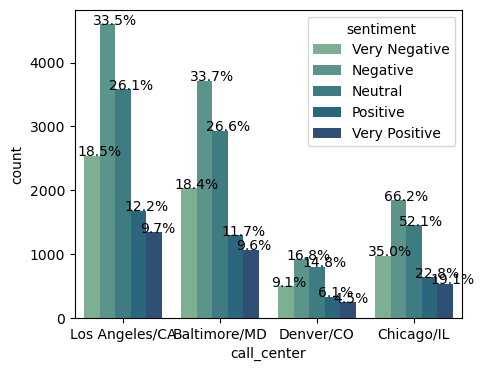

In [21]:
plt.figure(figsize=(5,4))
ax = sns.countplot(data=data, x='call_center', color='#3E7C82')
percent_info(ax, data)
plt.show()

plt.figure(figsize=(5,4))
ax = sns.countplot(data=data, x='call_center', hue='sentiment', 
                   hue_order=['Very Negative', 'Negative', 'Neutral', 'Positive', 'Very Positive'],
                   palette='crest')
percent_info_hue(ax, data['call_center'],4,5)